<a href="https://colab.research.google.com/github/ulusberrin/INM706_CW/blob/yasinunsal/sentiment_analysis_lstm_dropout_05_hidden_size_16_batch_size_256.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
!ls

 05180000029.ipynb
 FasterRCNN_112_112_faster_weights.ipynb
 FasterRCNN_112_112.ipynb
 FasterRCNN_112_112_mobilenet_v3_large_320_fpn.ipynb
 FasterRCNN_224_224.ipynb
 FasterRCNN_448_448.ipynb
 faster_rcnn_plots_and_summaries
 fruit-images-for-object-detection
'IMDB Dataset.csv'
 INM702-Task2.ipynb
'INM706_Lab7_Bert_classification (1).ipynb'
 INM706_Lab7_Bert_classification.ipynb
 sentiment_analysis_gru.ipynb
 sentiment_analysis_lstm_dropout_02.ipynb
 sentiment_analysis_lstm_dropout_05_hidden_size_128.ipynb
 sentiment_analysis_lstm_dropout_05_hidden_size_16_batch_size_256.ipynb
 sentiment_analysis_lstm_dropout_05_hidden_size_16_batch_size_64.ipynb
 sentiment_analysis_lstm_dropout_05_hidden_size_16.ipynb
 sentiment_analysis_lstm_dropout_05_hidden_size_32.ipynb
 sentiment_analysis_lstm_dropout_05_hidden_size_64.ipynb
 sentiment_analysis_lstm_dropout_05_hidden_size_8.ipynb
 sentiment_analysis_lstm_dropout_05.ipynb
 sentiment_analysis_lstm.ipynb
 sentiment_lstm.pt
 Untitled
 Untitled0.ipynb


In [27]:
%cd /content/drive/MyDrive/Colab\ Notebooks
!ls


/content/drive/MyDrive/Colab Notebooks
 05180000029.ipynb
 FasterRCNN_112_112_faster_weights.ipynb
 FasterRCNN_112_112.ipynb
 FasterRCNN_112_112_mobilenet_v3_large_320_fpn.ipynb
 FasterRCNN_224_224.ipynb
 FasterRCNN_448_448.ipynb
 faster_rcnn_plots_and_summaries
 fruit-images-for-object-detection
'IMDB Dataset.csv'
 INM702-Task2.ipynb
'INM706_Lab7_Bert_classification (1).ipynb'
 INM706_Lab7_Bert_classification.ipynb
 sentiment_analysis_gru.ipynb
 sentiment_analysis_lstm_dropout_02.ipynb
 sentiment_analysis_lstm_dropout_05_hidden_size_128.ipynb
 sentiment_analysis_lstm_dropout_05_hidden_size_16_batch_size_256.ipynb
 sentiment_analysis_lstm_dropout_05_hidden_size_16_batch_size_64.ipynb
 sentiment_analysis_lstm_dropout_05_hidden_size_16.ipynb
 sentiment_analysis_lstm_dropout_05_hidden_size_32.ipynb
 sentiment_analysis_lstm_dropout_05_hidden_size_64.ipynb
 sentiment_analysis_lstm_dropout_05_hidden_size_8.ipynb
 sentiment_analysis_lstm_dropout_05.ipynb
 sentiment_analysis_lstm.ipynb
 sentim

In [28]:
import pandas as pd
import numpy as np
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('wordnet')
stopwords = set(stopwords.words("english"))

from sklearn.model_selection import train_test_split
import tensorflow as tf

import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv("IMDB Dataset.csv", sep=",")
df.head()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [29]:
df["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [30]:
def remove_html(review):
  review = review.replace("<br /><br />", "")
  return review

def remove_punctuations(review):
  for punctuation in string.punctuation:
    review = review.replace(punctuation, "")
    return review

def remove_digits(review):
  review = "".join(y for y in review if not y.isdigit())
  return review

def remove_nonascii(review):
  review = re.sub(r'[^\x00-\x7f]', r'', review)
  return review

def make_lower(review):
  review = review.lower()
  return review

def remove_stop_words(review):
  review = ' '.join([word for word in review.split() if word not in (stopwords)])
  return review


def clean_review(review):
  review = remove_html(review)
  review = remove_punctuations(review)
  review = remove_digits(review)
  review = remove_nonascii(review)
  review = make_lower(review)
  review = remove_stop_words(review)
  return review


In [31]:
df["clean_review"] = df["review"].progress_apply(clean_review)

df.head()

100%|██████████| 50000/50000 [00:08<00:00, 5856.04it/s]


,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production. filming technique...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there's family little boy (jake) thi...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love time money"" visually stu..."


In [32]:
df["sentiment"] = df["sentiment"].replace("positive", 1)
df["sentiment"] = df["sentiment"].replace("negative", 0)


df.head()


,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,1,wonderful little production. filming technique...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically there's family little boy (jake) thi...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,"petter mattei's ""love time money"" visually stu..."


In [33]:

data = df["clean_review"].values.tolist()
target = df["sentiment"].values.tolist()

train_review, temp_review, train_sentiment, temp_sentiment = train_test_split(
                                                                              data,
                                                                              target,
                                                                              random_state=42,
                                                                              test_size=0.3,
                                                                              )
val_review, test_review, val_sentiment, test_sentiment = train_test_split(
                                                                          temp_review,
                                                                          temp_sentiment,
                                                                          random_state=42,
                                                                          test_size = 0.5,
                                                                          )

In [34]:
print(tf.__version__)

#tokenizing process
num_words = 10000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words)
tokenizer.fit_on_texts(data)
tokenizer.word_index

2.15.0


{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'the': 6,
 'it': 7,
 'time': 8,
 'even': 9,
 'would': 10,
 'really': 11,
 'see': 12,
 'story': 13,
 'well': 14,
 'much': 15,
 'bad': 16,
 'get': 17,
 'great': 18,
 'also': 19,
 'people': 20,
 'first': 21,
 'made': 22,
 'make': 23,
 'way': 24,
 'movies': 25,
 'could': 26,
 'think': 27,
 'characters': 28,
 'watch': 29,
 'films': 30,
 'two': 31,
 'many': 32,
 'seen': 33,
 'character': 34,
 'never': 35,
 'plot': 36,
 'love': 37,
 'acting': 38,
 'life': 39,
 'best': 40,
 'know': 41,
 'show': 42,
 'little': 43,
 'i': 44,
 'ever': 45,
 'this': 46,
 'better': 47,
 'end': 48,
 'man': 49,
 'scene': 50,
 'still': 51,
 'say': 52,
 'scenes': 53,
 'and': 54,
 'something': 55,
 'go': 56,
 'back': 57,
 'real': 58,
 "i'm": 59,
 'watching': 60,
 'thing': 61,
 'actors': 62,
 'though': 63,
 'years': 64,
 'funny': 65,
 'old': 66,
 'another': 67,
 'work': 68,
 'actually': 69,
 'nothing': 70,
 'makes': 71,
 'look': 72,
 'director': 73,
 'find': 74,

In [35]:
train_review_tokens = tokenizer.texts_to_sequences(train_review)
val_review_tokens = tokenizer.texts_to_sequences(val_review)
test_review_tokens = tokenizer.texts_to_sequences(test_review)

print(train_review[1])
print(train_review_tokens[1])


good ppv, like wrestlemania xx years later, wwe crammed many matches it, matches useless. i'm going go every match card would take forever do.however major highlights included huge pop demolition winning tag team belts haku andre giant, first ever mixed tag match featuring randy savage sensational queen sherri vs dusty rhodes late sapphire first ever clash ultimate warrior hulk hogan.some matches complete waste time. like bolsheviks vs hart foundation seconds long, koko b ware vs rick martel short big bossman vs akeem short.mr perfect vs brutus beefcake ted dibiase vs jake 'the snake' roberts good indeed.overall grade - b
[5, 4, 9009, 64, 216, 5387, 32, 4403, 7, 4403, 3054, 59, 75, 56, 79, 952, 3305, 10, 93, 1332, 440, 94, 575, 3351, 1863, 557, 1491, 1648, 3879, 636, 5369, 1256, 21, 45, 1844, 3879, 952, 1917, 3772, 3655, 7192, 1616, 1502, 8334, 435, 21, 45, 6477, 2033, 3815, 5824, 5921, 1178, 4403, 510, 362, 8, 4, 1502, 4577, 6343, 1543, 100, 397, 1502, 3690, 244, 97, 1502, 244, 349, 3

In [36]:
#padding process

maxlen = 256
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences
train_review_pad = pad_sequences(train_review_tokens, maxlen=maxlen)
val_review_pad = pad_sequences(val_review_tokens, maxlen=maxlen)
test_review_pad = pad_sequences(test_review_tokens, maxlen=maxlen)

print(train_review_pad.shape)
print(val_review_pad.shape)
print(test_review_pad.shape)

(35000, 256)
(7500, 256)
(7500, 256)


In [37]:
batch_size = 256

train_set = TensorDataset(torch.from_numpy(train_review_pad), torch.tensor(train_sentiment))
val_set = TensorDataset(torch.from_numpy(val_review_pad), torch.tensor(val_sentiment))
test_set = TensorDataset(torch.from_numpy(test_review_pad), torch.tensor(test_sentiment))

train_loader = DataLoader(train_set, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_set, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_set, shuffle=True, batch_size=batch_size)

In [38]:
class LSTMModel(nn.Module):
  def __init__(
    self,
    vocab_size,
    output_size,
    hidden_size,
    embedding_size,
    n_layers,
    dropout
    ):

    super(LSTMModel, self).__init__()
    self.embedding = nn.Embedding(vocab_size, embedding_size)
    #self.dropout = nn.Dropout(dropout)
    self.dropout1d = nn.Dropout1d(dropout)
    self.lstm = nn.LSTM(embedding_size, hidden_size, n_layers, dropout=dropout, batch_first=True)
    #self.dropout = nn.Dropout(0.3)
    self.fc = nn.Linear(hidden_size, output_size)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = x.long()
    x = self.embedding(x)
    x = self.dropout1d(x)
    out, _ =  self.lstm(x)
    out = out[:, -1, :]
    #out = self.dropout(out)
    out = self.fc(out)
    out = self.sigmoid(out)

    return out

In [39]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [40]:
vocab_size = num_words
output_size = 1
embedding_size = 256
hidden_size = 16
n_layers = 2
dropout = 0.5

# model initialization
model = LSTMModel(vocab_size, output_size, hidden_size, embedding_size, n_layers, dropout)
print(model)

LSTMModel(
  (embedding): Embedding(10000, 256)
  (dropout1d): Dropout1d(p=0.5, inplace=False)
  (lstm): LSTM(256, 16, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [41]:
# training config
#lr = 5e-4
#criterion = nn.CrossEntropyLoss()
lr = 0.001
criterion = nn.BCELoss()
optim = Adam(model.parameters(), lr=lr)
grad_clip = 5
epochs = 10
print_every = 1
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': [],
    'epochs': epochs
}

In [42]:
# train loop
model = model.to(device)

epochloop = tqdm(range(epochs), position=0, desc='Training', leave=True)

for e in epochloop:

  #train
  model.train()

  train_loss = 0
  train_acc = 0

  for id, (feature, target) in enumerate(train_loader):
      epochloop.set_postfix_str(f'Training batch {id}/{len(train_loader)}')
      feature, target = feature.to(device), target.to(device)
      optim.zero_grad()
      out = model(feature)

      # acc
      predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
      equals = predicted == target
      acc = torch.mean(equals.type(torch.FloatTensor))
      train_acc += acc.item()

      # loss
      loss = criterion(out.squeeze(), target.float())
      train_loss += loss.item()
      loss.backward()

      # clip grad
      nn.utils.clip_grad_norm_(model.parameters(), grad_clip)

      # update optimizer
      optim.step()

      del feature, target, predicted

  history['train_loss'].append(train_loss / len(train_loader))
  history['train_acc'].append(train_acc / len(train_loader))

  #validation
  model.eval()

  val_loss = 0
  val_acc = 0

  with torch.no_grad():
      for id, (feature, target) in enumerate(val_loader):
          epochloop.set_postfix_str(f'Validation batch {id}/{len(val_loader)}')
          feature, target = feature.to(device), target.to(device)
          out = model(feature)

          # acc
          predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
          equals = predicted == target
          acc = torch.mean(equals.type(torch.FloatTensor))
          val_acc += acc.item()

          # loss
          loss = criterion(out.squeeze(), target.float())
          val_loss += loss.item()

          del feature, target, predicted

      history['val_loss'].append(val_loss / len(val_loader))
      history['val_acc'].append(val_acc / len(val_loader))

  # reset model mode
  model.train()

  # add epoch meta info
  epochloop.set_postfix_str(f'Val Loss: {val_loss / len(val_loader):.3f} | Val Acc: {val_acc / len(val_loader):.3f}')

  # print epoch
  if (e+1) % print_every == 0:
      epochloop.write(f'Epoch {e+1}/{epochs} | Train Loss: {train_loss / len(train_loader):.3f} Train Acc: {train_acc / len(train_loader):.3f} | Val Loss: {val_loss / len(val_loader):.3f} Val Acc: {val_acc / len(val_loader):.3f}')
      epochloop.update()


Training:  20%|██        | 2/10 [00:02<00:19,  2.49s/it, Training batch 12/137]

Epoch 1/10 | Train Loss: 0.684 Train Acc: 0.556 | Val Loss: 0.589 Val Acc: 0.725


Training:  40%|████      | 4/10 [00:05<00:09,  1.66s/it, Training batch 12/137]

Epoch 2/10 | Train Loss: 0.570 Train Acc: 0.712 | Val Loss: 0.458 Val Acc: 0.802


Training:  50%|█████     | 5/10 [00:07<00:07,  1.45s/it, Training batch 11/137]

Epoch 3/10 | Train Loss: 0.486 Train Acc: 0.777 | Val Loss: 0.394 Val Acc: 0.834


Training:  70%|███████   | 7/10 [00:10<00:05,  1.72s/it, Training batch 12/137]

Epoch 4/10 | Train Loss: 0.443 Train Acc: 0.802 | Val Loss: 0.358 Val Acc: 0.853


Training:  80%|████████  | 8/10 [00:12<00:03,  1.51s/it, Training batch 12/137]

Epoch 5/10 | Train Loss: 0.417 Train Acc: 0.814 | Val Loss: 0.337 Val Acc: 0.862


Training:  90%|█████████ | 9/10 [00:15<00:01,  1.74s/it, Training batch 12/137]

Epoch 6/10 | Train Loss: 0.394 Train Acc: 0.827 | Val Loss: 0.318 Val Acc: 0.869


Training: 11it [00:17,  1.93s/it, Training batch 12/137]

Epoch 7/10 | Train Loss: 0.381 Train Acc: 0.834 | Val Loss: 0.312 Val Acc: 0.872


Training: 12it [00:20,  1.64s/it, Training batch 11/137]

Epoch 8/10 | Train Loss: 0.364 Train Acc: 0.842 | Val Loss: 0.303 Val Acc: 0.876


Training: 13it [00:22,  1.83s/it, Training batch 12/137]

Epoch 9/10 | Train Loss: 0.355 Train Acc: 0.848 | Val Loss: 0.297 Val Acc: 0.876


Training: 100%|██████████| 10/10 [00:25<00:00,  2.50s/it, Val Loss: 0.288 | Val Acc: 0.878]

Epoch 10/10 | Train Loss: 0.347 Train Acc: 0.849 | Val Loss: 0.288 Val Acc: 0.878


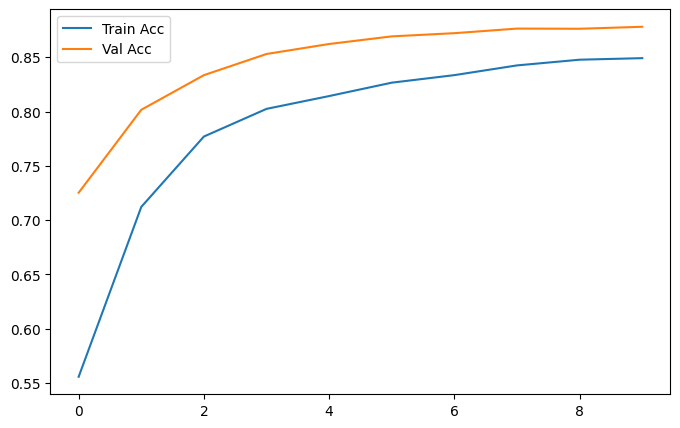

In [43]:
# plot acc
plt.figure(figsize=(8, 5))
plt.plot(range(history['epochs']), history['train_acc'], label='Train Acc')
plt.plot(range(history['epochs']), history['val_acc'], label='Val Acc')
plt.legend()
plt.show()

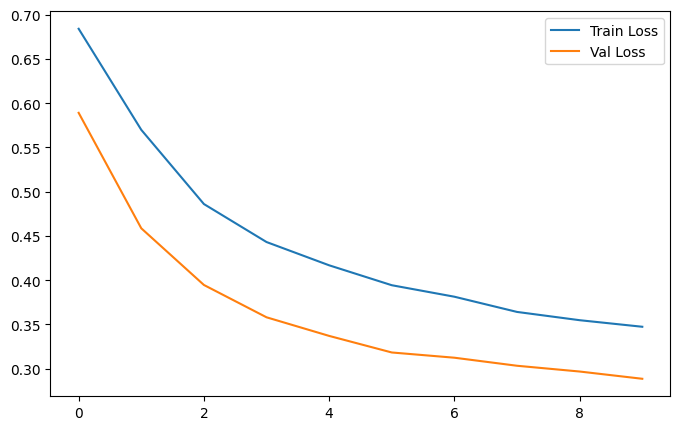

In [44]:
# plot loss
plt.figure(figsize=(8, 5))
plt.plot(range(history['epochs']), history['train_loss'], label='Train Loss')
plt.plot(range(history['epochs']), history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

In [45]:
model.eval()

# metrics
test_loss = 0
test_acc = 0

all_target = []
all_predicted = []

testloop = tqdm(test_loader, leave=True, desc='Inference')
with torch.no_grad():
    for feature, target in testloop:
        feature, target = feature.to(device), target.to(device)

        out = model(feature)

        predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
        equals = predicted == target
        acc = torch.mean(equals.type(torch.FloatTensor))
        test_acc += acc.item()

        loss = criterion(out.squeeze(), target.float())
        test_loss += loss.item()

        all_target.extend(target.cpu().numpy())
        all_predicted.extend(predicted.cpu().numpy())

    print(f'Accuracy: {test_acc/len(test_loader):.4f}, Loss: {test_loss/len(test_loader):.4f}')

Inference: 100%|██████████| 30/30 [00:00<00:00, 95.70it/s]

Accuracy: 0.8809, Loss: 0.2892


In [46]:
print(classification_report(all_predicted, all_target))


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3693
           1       0.89      0.88      0.88      3807

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500



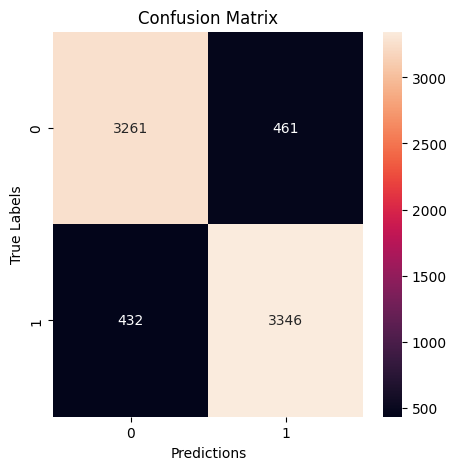

In [47]:
cm = confusion_matrix(all_target, all_predicted)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel("Predictions")
plt.ylabel("True Labels")
plt.title('Confusion Matrix')
plt.show()

In [49]:
def review_pred(review, model):
  review = [review]
  for i in range(len(review)):
    review[i] = clean_review(review[i])

  review = tokenizer.texts_to_sequences(review)
  review = pad_sequences(review, maxlen=maxlen, dtype="int32")

  sentiment = model(torch.tensor(review).to(device)).to(device)

  pred = sentiment.cpu().detach().numpy()
  print(pred.item())

  if(pred < 0.5):
      print("negative")
  elif (pred >= 0.5):
      print("positive")

review = "this movie is great"

review_pred(review, model)

review = "this movie is terrible"

review_pred(review, model)

review = "this movie is not terrible, it's great!"

review_pred(review, model)

review = "this movie is not great, it's terrible!"

review_pred(review, model)


0.5573001503944397
positive
0.2953096032142639
negative
0.46851518750190735
negative
0.45269522070884705
negative
